In [325]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [326]:
df=pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0,13,5,5,drizzle
1,2012-01-02,11,11,3,4,rain
2,2012-01-03,1,12,7,2,rain
3,2012-01-04,20,12,6,5,rain
4,2012-01-05,1,9,3,6,rain
...,...,...,...,...,...,...
1456,2015-12-27,9,4,2,3,rain
1457,2015-12-28,2,5,2,1,rain
1458,2015-12-29,0,7,1,3,fog
1459,2015-12-30,0,6,-1,3,sun


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [328]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461,1461,1461,1461
mean,3,16,8,3
std,7,7,5,1
min,0,-2,-7,0
25%,0,11,4,2
50%,0,16,8,3
75%,3,22,12,4
max,56,36,18,10


In [329]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [330]:
df.duplicated().sum()

0

In [331]:
df[df['temp_min']==min(df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0,0,-7,3,sun


In [332]:
df[df['temp_max']==max(df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0,36,18,3,rain


<Axes: xlabel='temp_max', ylabel='Count'>

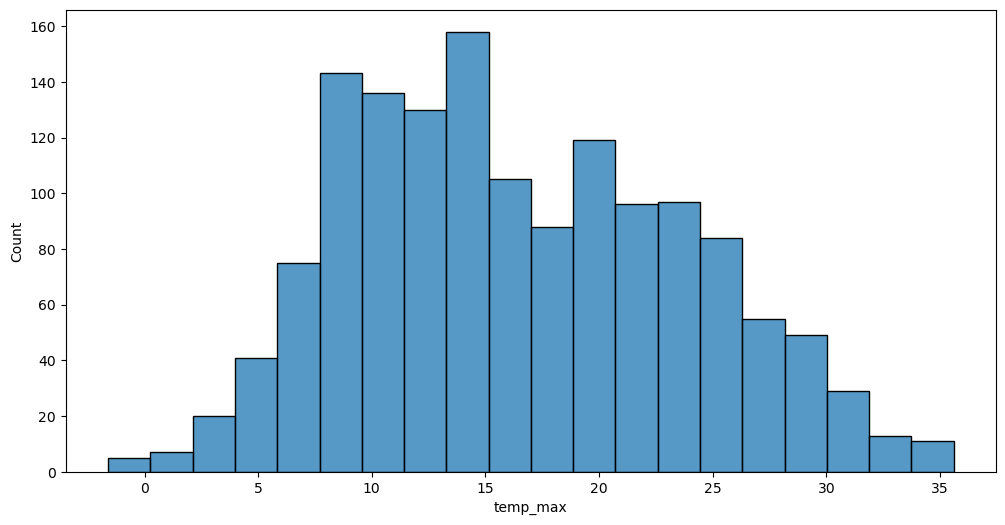

In [333]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_max,bins=20)

<Axes: xlabel='temp_min', ylabel='Count'>

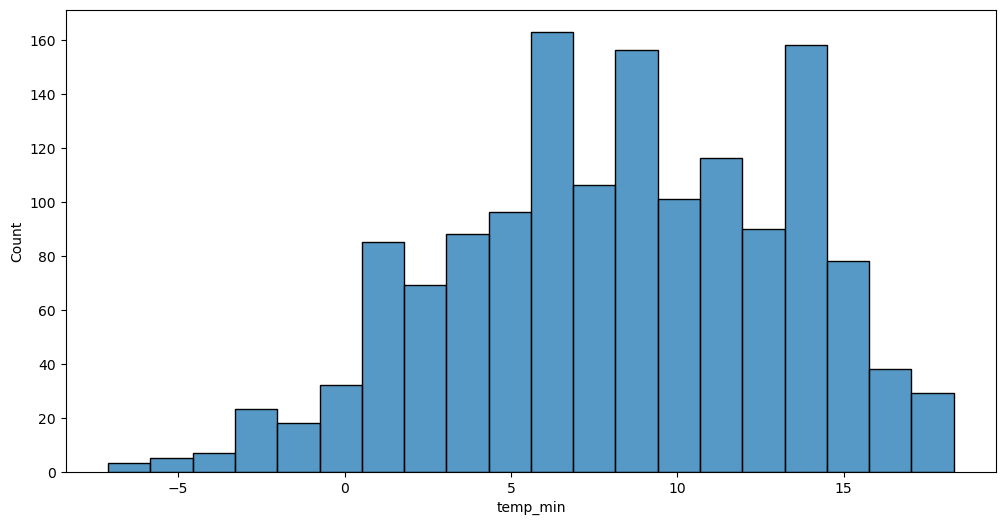

In [334]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min,bins=20)

In [335]:
df.loc[:,['date','temp_max']]
df["year"]=df["date"].apply(lambda x: x.split("-")[0]).astype(int)
df["month"]=df["date"].apply(lambda x: x.split("-")[1]).astype(int)
df["date"]=df["date"].apply(lambda x: x.split("-")[-1]).astype(int)
print(df.head())
print(df['weather'].unique())

   date  precipitation  temp_max  temp_min  wind  weather  year  month
0     1              0        13         5     5  drizzle  2012      1
1     2             11        11         3     4     rain  2012      1
2     3              1        12         7     2     rain  2012      1
3     4             20        12         6     5     rain  2012      1
4     5              1         9         3     6     rain  2012      1
['drizzle' 'rain' 'sun' 'snow' 'fog']


In [336]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   int32  
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
 6   year           1461 non-null   int32  
 7   month          1461 non-null   int32  
dtypes: float64(4), int32(3), object(1)
memory usage: 74.3+ KB


In [337]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])
label_mapping = {index: label for index, label in enumerate(le.classes_)} 
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'drizzle', 1: 'fog', 2: 'rain', 3: 'snow', 4: 'sun'}


Accuracy of gaussian: 0.43686006825938567
Confusion Matrix of gaussian:
[[  8   0   0   0   1]
 [ 25   0   0   0   0]
 [  7   0 112   0   1]
 [  0   0   8   0   0]
 [122   0   1   0   8]]
Classification Report of gaussian:
              precision    recall  f1-score   support

           0       0.05      0.89      0.09         9
           1       1.00      0.00      0.00        25
           2       0.93      0.93      0.93       120
           3       1.00      0.00      0.00         8
           4       0.80      0.06      0.11       131

    accuracy                           0.44       293
   macro avg       0.76      0.38      0.23       293
weighted avg       0.85      0.44      0.43       293



c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


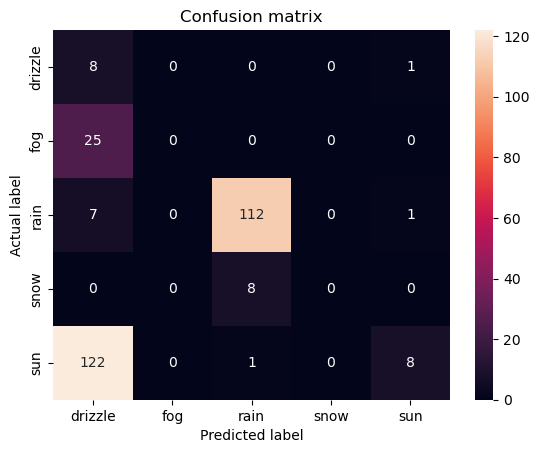

Accuracy of multinomial: 0.6723549488054608
Confusion Matrix of multinomial:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  2   0  65  21  32]
 [  0   0   4   4   0]
 [  0   0   3   0 128]]
Classification Report of multinomial:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.90      0.54      0.68       120
           3       0.16      0.50      0.24         8
           4       0.66      0.98      0.79       131

    accuracy                           0.67       293
   macro avg       0.54      0.40      0.34       293
weighted avg       0.75      0.67      0.64       293



c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


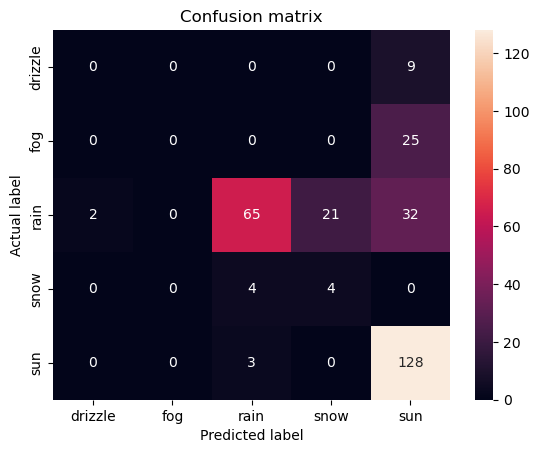

c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


Accuracy of bernoulli: 0.8293515358361775
Confusion Matrix of bernoulli:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 112   0   8]
 [  0   0   8   0   0]
 [  0   0   0   0 131]]
Classification Report of bernoulli:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.93      0.93      0.93       120
           3       1.00      0.00      0.00         8
           4       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.94      0.39      0.36       293
weighted avg       0.86      0.83      0.77       293



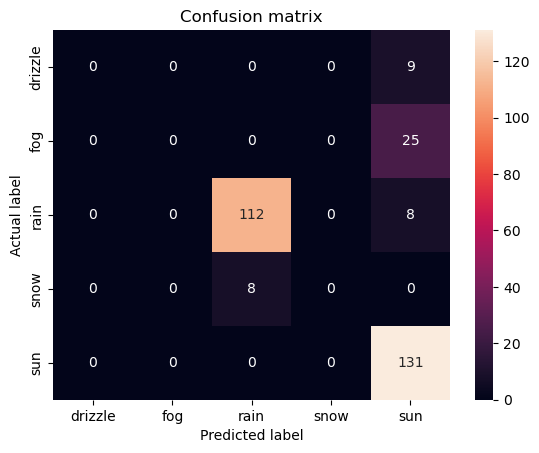

Accuracy of complement: 0.7303754266211604
Confusion Matrix of complement:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0  86   0  34]
 [  0   0   8   0   0]
 [  0   0   3   0 128]]
Classification Report of complement:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.89      0.72      0.79       120
           3       1.00      0.00      0.00         8
           4       0.65      0.98      0.78       131

    accuracy                           0.73       293
   macro avg       0.91      0.34      0.32       293
weighted avg       0.80      0.73      0.67       293



c:\Users\sanja\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but ComplementNB was fitted without feature names
  warnings.warn(


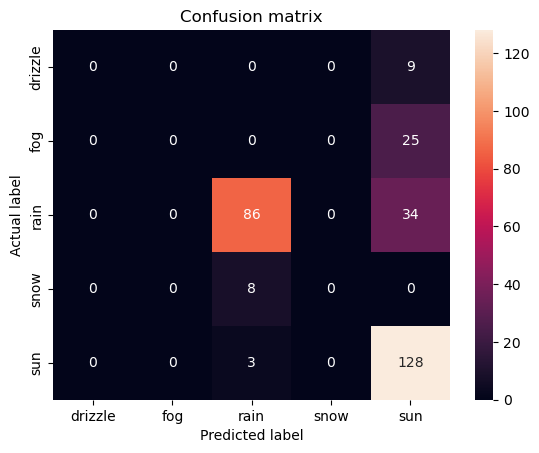

In [338]:
x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=df['weather']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = [ [GaussianNB(), "gaussian"], [MultinomialNB(), "multinomial"], [BernoulliNB(), "bernoulli"], [ComplementNB(), "complement"] ]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
for i in model:
    nb_model = i[0]
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, zero_division=1)
    print(f"Accuracy of {i[1]}: {accuracy}")
    print(f"Confusion Matrix of {i[1]}:")
    print(conf_matrix)
    print(f"Classification Report of {i[1]}:")
    print(classification_rep)
    class_names=[label_mapping[x] for x in label_mapping]
    sns.heatmap(conf_matrix,annot=True,xticklabels=class_names,fmt='d', yticklabels=class_names)
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
